- Feature selection provides an alternative to random subspaces for selecting groups of input features
- One Method: Generate a feature subspace for each number of features from 1 to the number of columns in the dataset, fit a model on each, and combine their predictions
- Multiple Methods: Generate a feature subspace using multiple different feature selection methods, fit a model on each, and combine their predictions.

#### Baseline

In [1]:
# evaluate a decision tree on the classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the random subspace ensemble model
model = DecisionTreeClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Mean Accuracy: 0.801 (0.053)


#### Single Feature Selection Method Ensembles

- Creating an ensemble from the features selected by individual feature selection methods

In [2]:
#ANOVA F-statistic Ensemble
# example of an ensemble created from features selected with the anova f-statistic
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
    # define the base models
    models = list()
    # enumerate the features in the training dataset
    for i in range(1, n_features+1):
        # create the feature selection transform
        fs = SelectKBest(score_func=f_classif, k=i)
        # create the model
        model = DecisionTreeClassifier()
        # create the pipeline
        pipe = Pipeline([('fs',fs), ('m', model)])
        # add as a tuple to the list of models for voting
        models.append((str(i),pipe))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble(X.shape[1])
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.828 (0.042)


Can see improvement

#### Mutual Information Ensemble

- Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. It is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, it can be adapted for use with numerical input and categorical output.

In [3]:
# example of an ensemble created from features selected with mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
    # define the base models
    models = list()
    # enumerate the features in the training dataset
    for i in range(1, n_features+1):
        # create the feature selection transform
        fs = SelectKBest(score_func=mutual_info_classif, k=i)
        # create the model
        model = DecisionTreeClassifier()
        # create the pipeline
        pipe = Pipeline([('fs',fs), ('m', model)])
        # add as a tuple to the list of models for voting
        models.append((str(i),pipe))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble(X.shape[1])
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.831 (0.041)


#### Recursive Feature Selection Ensemble

Recursive Feature Elimination, or RFE for short, works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [4]:
# example of an ensemble created from features selected with RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
    # define the base models
    models = list()
    # enumerate the features in the training dataset
    for i in range(1, n_features+1):
        # create the feature selection transform
        fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        # create the model
        model = DecisionTreeClassifier()
        # create the pipeline
        pipe = Pipeline([('fs',fs), ('m', model)])
        # add as a tuple to the list of models for voting
        models.append((str(i),pipe))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# get the ensemble model
ensemble = get_ensemble(X.shape[1])
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.822 (0.040)


#### Ensemble With Fixed Number of Features

In [5]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get a voting ensemble of models
def get_ensemble(n_features):
    # define the base models
    models = list()
    # anova
    fs = SelectKBest(score_func=f_classif, k=n_features)
    anova = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    models.append(('anova', anova))
    # mutual information
    fs = SelectKBest(score_func=mutual_info_classif, k=n_features)
    mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    models.append(('mutinfo', mutinfo))
    # rfe
    fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
    rfe = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    models.append(('rfe', rfe))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble
 
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get the ensemble model
ensemble = get_ensemble(15)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.846 (0.036)


Best till now

>anova: 0.823 (0.041)
>mutinfo: 0.810 (0.044)
>rfe: 0.824 (0.039)
>ensemble: 0.837 (0.043)


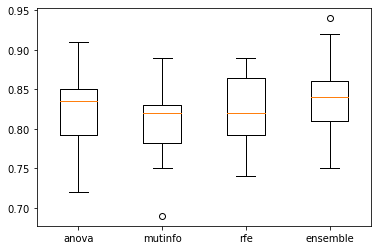

In [6]:
# comparison of ensemble of a fixed number features to single models fit on each set of features
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features):
    # define the base models
    models, names = list(), list()
    # anova
    fs = SelectKBest(score_func=f_classif, k=n_features)
    anova = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    models.append(('anova', anova))
    names.append('anova')
    # mutual information
    fs = SelectKBest(score_func=mutual_info_classif, k=n_features)
    mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    models.append(('mutinfo', mutinfo))
    names.append('mutinfo')
    # rfe
    fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
    rfe = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    models.append(('rfe', rfe))
    names.append('rfe')
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    names.append('ensemble')
    return names, [anova, mutinfo, rfe, ensemble]

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get the ensemble model
names, models = get_ensemble(15)
# evaluate each model
results = list()
for model,name in zip(models,names):
    # define the evaluation method
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model on the dataset
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))
    results.append(n_scores)
# plot the results for comparison
pyplot.boxplot(results, labels=names)
pyplot.show()

ensemble outperforms individual models

#### Ensemble With Contiguous Number of Features

In [7]:
# ensemble of many subsets of features selected by multiple feature selection methods
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble(n_features_start, n_features_end):
    # define the base models
    models = list()
    for i in range(n_features_start, n_features_end+1):
        # anova
        fs = SelectKBest(score_func=f_classif, k=i)
        anova = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
        models.append(('anova'+str(i), anova))
        # mutual information
        fs = SelectKBest(score_func=mutual_info_classif, k=i)
        mutinfo = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
        models.append(('mutinfo'+str(i), mutinfo))
        # rfe
        fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        rfe = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
        models.append(('rfe'+str(i), rfe))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get the ensemble model
ensemble = get_ensemble(1, 20)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.861 (0.036)


#### Extra Trees

- Extremely Randomized Trees, or Extra Trees for short, is an ensemble machine learning algorithm
- Specifically, it is an ensemble of decision trees and is related to other ensembles of decision trees algorithms such as bootstrap aggregation (bagging) and random forest
- The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification
- Unlike bagging and random forest that develop each decision tree from a bootstrap sample of the training dataset, the Extra Trees algorithm fits each decision tree on the whole training dataset
- Like random forest, the Extra Trees algorithm will randomly sample the features at each split point of a decision tree
- Unlike random forest, which uses a greedy algorithm to select an optimal split point, the Extra Trees algorithm selects a split point at random

In [8]:
# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.911 (0.024)


In [9]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.52169364,4.00560592,2.94756812,-0.09755101,-0.98835896,1.81021933,-0.32657994,1.08451928,4.98150546,-2.53855736,3.43500614,1.64660497,-4.1557091,-1.55301045,-0.30690987,-1.47665577,6.818756,0.5132918,4.3598337,-4.31785495]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


#### Extra Trees for Regression

In [10]:
# evaluate extra trees ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.352 (5.330)


In [11]:
# extra trees for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.56996683,0.80144889,2.77523539,1.32554027,-1.44494378,-0.80834175,-0.84142896,0.57710245,0.96235932,-0.66303907,-1.13994112,0.49887995,1.40752035,-0.2995842,-0.05708706,-2.08701456,1.17768469,0.13474234,0.09518152,-0.07603207]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 53


#### Bagging-ensemble-with-different-data-transformations

In [12]:
# evaluate data transform bagging ensemble on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# get a voting ensemble of models
def get_ensemble():
    # define the base models
    models = list()
    # normalization
    norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
    models.append(('norm', norm))
    # standardization
    std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
    models.append(('std', std))
    # robust
    robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
    models.append(('robust', robust))
    # power
    power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
    models.append(('power', power))
    # quantile
    quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeClassifier())])
    models.append(('quant', quant))
    # kbins
    kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeClassifier())])
    models.append(('kbins', kbins))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get models
ensemble = get_ensemble()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.833 (0.043)
